In [1]:
from ref_flow import main
import pyomo.environ as pyo
from IPython.display import display, Markdown, SVG, HTML
from idaes.core.util.expr_doc import document_constraints

In [2]:
m, solver = main()

Ipopt 3.13.2: tol=1e-06
halt_on_ampl_error=no
max_iter=50


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

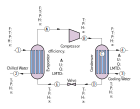

In [3]:
display(SVG("ref_diagram.svg"))

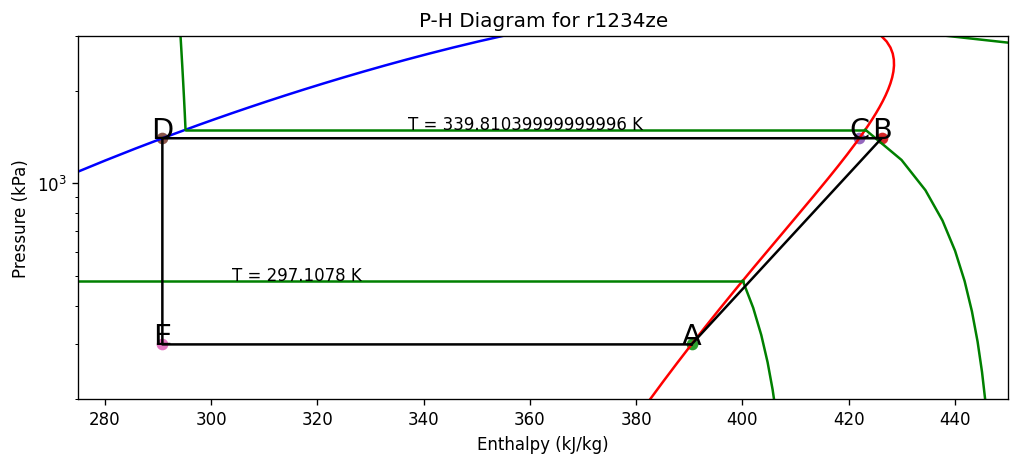

In [4]:
pA = m.fs.compressor.control_volume.properties_in[0]
pB = m.fs.compressor.control_volume.properties_out[0]
pD = m.fs.condenser.hot_side.properties_out[0]
pE = m.fs.valve.control_volume.properties_out[0]
pA2 = m.fs.evaporator.cold_side.properties_out[0]
pCW = m.fs.evaporator.hot_side.properties_out[0]

ph_plot = {
    "A": (pyo.value(pA.enth_mol*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pA.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
    "B": (pyo.value(pB.enth_mol*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pB.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
    "C": (pyo.value(pB.enth_mol_sat_phase["Vap"]*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pB.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
    "D": (pyo.value(pD.enth_mol*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pD.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
    "E": (pyo.value(pD.enth_mol*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pE.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
}

m.fs.prop_ref.ph_diagram(points=ph_plot, ylim=(200, 3000), xlim=(275, 450), dpi=120, figsize=(10,4)).show()

In [6]:
display(HTML("<script src='https://www.gstatic.com/external_hosted/"
             "mathjax/latest/MathJax.js?config=default'></script>"))
display(Markdown(document_constraints(m.fs.compressor, descend_into=False, doc=False)))

**Constraint:** fs.compressor.eq_enth_out
$$0.0 = - \overline{w} + h_1 - h_0$$
**Constraint:** fs.compressor.eq_flow_out
$$0.0 = F_1 - F_0$$
**Expression:** fs.compressor.h_s
$$h_s = h(c=r1234ze, s=s_0, p=p_1)$$
**Expression:** fs.compressor.specific_work
$$\overline{w} = \frac{h_s - h_0}{\eta}$$
**Expression:** fs.compressor.work
$$w = \overline{w} F_0$$
**Fixed Var:** fs.compressor.control_volume.properties_out[0.0].pressure = 1400000.0
$$p_1 = 1400000.0 \text{ Pa }$$
**Fixed Var:** fs.compressor.efficiency = 0.8
$$\eta = 0.8 \text{ None }$$